<a href="https://colab.research.google.com/github/NikolayLenkovNikolaev/Bayes_theory_models/blob/main/Monte_Carlo_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Monte Carlo estimation:

## 1. Sumulation and CLT

Monte Carlo estyimation refers to simulationg hypothethical draws from a probability distribution in order to calculate important quantities. These quantitites might include the mean, the variance, the probability of some event, or quantiles of the distribution. All of these calculations involve integration, which except for the simplest distributions, can be very dificult or impossible.

Suppose we have a random variable $\theta$ that follows a Gamma(a,b) distribution. Let is say a =2 and b =1/3 , where b is the rate parameter. To calculate the mean of this distribution, we could need to compute the following integral.


$$E(\theta) = \int_0^{\infty} \theta f(\theta) d\theta = \int_0^{∞} \theta \frac{b^a}{\Gamma(a)}\theta^{1-1} e^{-b\theta}d\theta$$

It is possible to compute this integral , and the answer is a/b =6 in this case. However, we could verity this answer through Monte Carlo estimation. To do so, we would simulate a large number of draws (call then $\theta_i^*$ fori=1,..,m) from this gamma distribution and calculate their sample mean.

Why can we do this? If we have a random sample from a disribution, the average of this samples converfes in probaility to the true mean of that distribution by the Law of Large Numbers. Furthermoree, by the Cental Limit Theorem (CLT) , this sample mean $\bar{\theta}^* = \frac{1}{m} \sum_{i=1}^m \theta_i^*$ approximately follows a normal distribution with mean $E[\theta]$ and $Var[\theta]/m$. The theorical variance of $\theta$ is the following integral:

$$Var[\theta] = \int_0^{\infty} (\theta - E[\theta])^2 f(\theta)d\theta$$

just like we didi the mean, we could epproximate this variance with the sample variance $\frac{1}{m} \sum_{i=1}^m (\theta_i^* - \bar{\theta^*})^2$


## 2.cCalculating probabilitues:

This method can be used to calculate many diffferent integrals. Say $h(\theta)$ is any function and we want to calculate $\int h(\theta)p(\theta)d\theta$. This integral is precisely what is mean by $E[h(\theta)]$, so we can conveniently approximate it by taking the sample mean of $h(\theta_i^*)$. That is, we appluy the function h to each simulated sample from the distribution, and take the average of all the results.

So what does this mean? It means we can approximate the probability that $\theta <5$ by drawing many samples $\theta_i^*$, and approximating this integral with $\frac{1}{m} \sum_{i=1}^m I_{\theta^* <5}(\theta_i^*)$. This expression is ismply counting how many samples come out to be less than 5, adn dividing by the total number of simulated samples. That is convenient!

Lokewise, we can approximate quantiles of a distribution. If we are looking for the value x such that $P(\theta <z)=0.9$, xw simply arrange the samples $\theta_i^*$ in ascending order and find the smallest drawn value that is greater than 90% of the others/

## Monte Carlo Error:

How good is an approximation by MC sampling? Again we can turn to the CLT, which tells us that the vairance of our estimate is controlled in part by m. For a better estimate, we want larger $m$.

For example, if we seek $E[\theta]$, that the sample mean $\bar{\theta^*}$ approximately follows a normal distribution with mean $E[\theta]$ and Variance $Var[\theta]/m$. The variance tells us how far our estimate might be from the true value. One way to approximate $Var[\theta]$ is to replacve it with the sample variance. The standard deviation of our Monte Carlo estimate is the square root of that , or the sample standard deviation devided by $\sqrt{m}$. If $m$ is large, it is reasonable to assume that the true value will likely be within about two standard deviations of your MC estimate.




## Marginalization:

We can also obtain MC samples from hierarchical models. As a simple example, let is consider a binomial random variable where $y|\phi \sim Bin(10, \phi)$ and further suppose $\phi$ is a random (as if it had prior) and is distributted beta $\phi \sim Beta(2,2)$. Given any hierarchical model, we can always write the joint distribution of $y$ and $\phi$ as $p(y, \phi)= p(y|\phi)p(\phi)$ using the chain rule of probability. To simulate from this join distribution, reapeat these steps for a large number $m$.
1. Simulate $\phi_i^*$ from Beta(2,2) distrribution
2. Given the drawn $\phi^*$ simulate $y_i^*$ form Bin(10, \phi_i^*)

This will produce m independent pairs $(y^*, \phi^*)_i$ drawn from their joint distribution. One major advantage of MC simulation is that marginalizing is easy. Calculating the marginal distribution of $y, p(y)= \int_0^1 p(y, \phi)d\phi$, might be challenging. But if we draws from the joint distribution, we can just discard the $\phi_i^*$ draws and use the $y_i^*$ as samples from their marginal distribution. This is also called the prior predictive distribution introduced in the previous course.

In the next segment, we wqill demonstrate some of these principles. Remember , we do not know how sample from fhe complicated posterior distribution introduced in the previous lesson. But once we learn that, we will be able to use principles from this lesson to make approximate inferences from those posterior distributions.



## Example: CLT

MC simulation from the most common distributions is very straighforward in R.

Let's start with the example from the previous segment, whre $\theta \sim Gammma(a,b)$, with a=2, b =1/3, This could represent the posterior distribution of $\theta$ if our data came from a Poisson distribution with mean $\theta$ and we had used conjugate gamma prior. Let's start with m=100.

In [3]:
set.seed(32) # intitializes the random number generator so we can replicate these results. to get different random numbers c hange the seed
m = 100
a=2
b=1/3

In [4]:
theta = rgamma(n=m, shape=a, rate=b)

In [7]:
theta

[1]  4.5539535  8.2806425  1.5155895  9.1602677  3.5078593  5.6069738
  [7]  2.4984625  3.7842213  6.4155922  4.1397592 15.4991608  4.6595258
 [13]  5.6031804  8.5813101  8.6586811  7.5968191  1.4826815  3.4946618
 [19]  4.8308749  2.1279710  7.6311934  8.3236268  6.6520271  9.3344812
 [25]  6.3392723  4.7993586  4.8085900  1.7375927  9.3555367  9.3588923
 [31]  2.9311010  2.5241264  3.6046101  5.9832805  3.8128900  7.9781588
 [37]  7.0784262  6.9890426  1.3334973  3.8343142  2.1542082 13.1452040
 [43]  1.9842672  4.9745038  1.7303524  4.5042310  5.5043305  4.2154853
 [49]  1.3251695 12.5956478 13.4595527  4.4873494  3.2852388  2.2375493
 [55]  5.8252910  3.1282582  6.6283565 14.1205970  6.7966279  5.5515803
 [61]  4.9697111 13.4813893  8.0451423  2.1502203 18.4230435  5.4197177
 [67]  2.1301930  2.8535119  0.9408533  4.8845528  2.7246125  6.6485571
 [73]  2.8952545  5.4169931  2.4050229  7.0022903  2.7973168  4.4758705
 [79] 10.5152280  2.4864338  9.9857291  1.3177572 10.9877766  2.6792076
 [85]  1.4750254  1.7554602  8.4346549  2.3489566  1.4271220  3.6671417
 [91]  7.3583902  3.6296028  3.9476954 11.3247543  2.4324032  7.1484435
 [97]  2.7157060  2.7636910  5.4136767  5.8656408

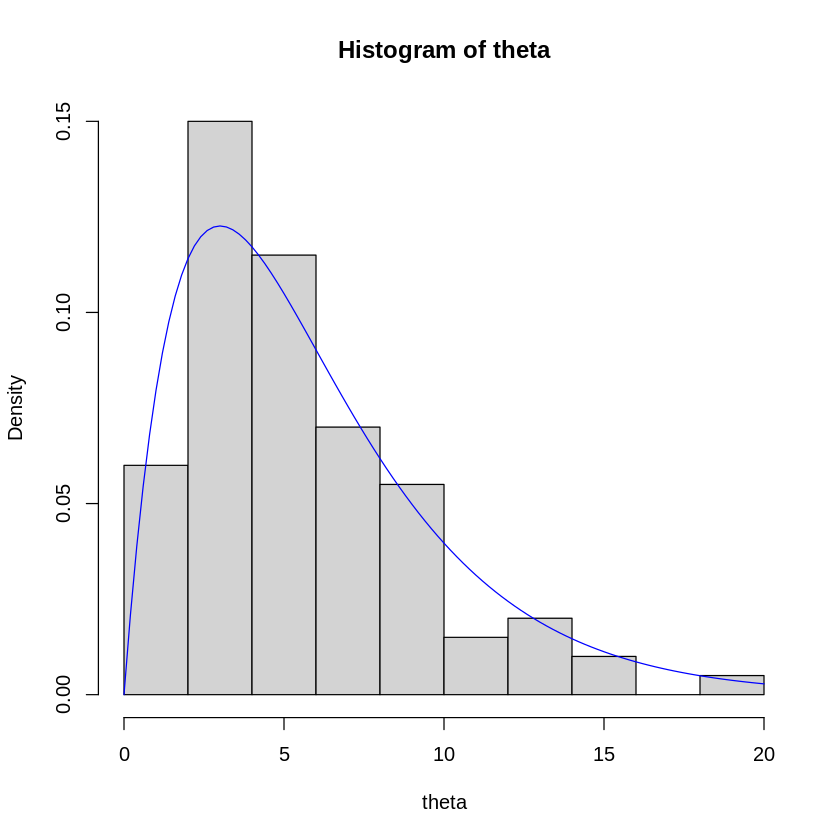

In [5]:
hist(theta, freq=FALSE)
curve(dgamma(x=x, shape=a, rate=b), col="blue", add=TRUE)

To find our MC approximation to $E[\theta]$, let's take the average of our sample (and compare it with the true).

In [10]:
sum(theta) / m # sample mean

[1] 5.514068

In [11]:
mean(theta) # sample mean

[1] 5.514068

In [12]:
a / b # true expected value

[1] 6

If we increase m = 10 000

In [13]:
m = 1e4
theta = rgamma(n=m, shape=a, rate=b)
mean(theta)

[1] 6.023273

How about the variance of $\theta$?

In [14]:
var(theta) # sample variance

[1] 18.04318

In [15]:
a / b^2 # true variance of Gamma(a,b)

[1] 18

We can also approximate the probability that $\theta < 5$

In [16]:
ind = theta < 5.0 # set of indicators, TRUE if theta_i < 5
mean(ind) # automatically converts FALSE/TRUE to 0/1

[1] 0.497

In [17]:
pgamma(q=5.0, shape=a, rate=b) # true value of Pr( theta < 5 )

[1] 0.4963317

What is the 0.9 quantile (90th percentile) of $\theta$? We can use the quatile function which will order the samples for us and find the appropriate sample quantile.

In [18]:
quantile(x=theta, probs=0.9)

90% 
11.74338

In [19]:
qgamma(p=0.9, shape=a, rate=b) # true value of 0.9 quantile

[1] 11.66916

## Monte Carlo Error:

We can use the CLT to approximate how accurate our Monte Carlo estimates are. For example, if we seek $ E[\theta]$, then the sample mean $\bar{\theta}^*$ approximately follows a normal distribution with mean $E[\theta]$ adn variance $Var[\theta]/m$. We will use the sample standard deviation divided by the squae root of m to approximate the Monte Carlo standard deviation.



In [20]:
se = sd(theta) / sqrt(m)
2.0 * se # we are reasonably confident that the Monte Carlo estimate is no more than this far from the truth

[1] 0.08495454

These numbers give us a reasonable range for the quantity we are estimating with Monte Carlo. The same applies for other Monte Carlo estimates, like the probability that $\theta < 5$

In [21]:
ind = theta < 5.0
se = sd(ind) / sqrt(m)
2.0 * se # we are reasonably confident that the Monte Carlo estimate is no more than this far from the truth

[1] 0.01000032

## Marginalization

Let's also do the second example of simulating a hierarchical model. In our example from the previous segment, we had a binomial random variable where $y|\phi \sim Bin(10, \phi)$ and $\phi \sim Beta(2,2)$. To simulate from this distibtution , repeat these steps for a large numbner m:
1. SImulate $\phi_i$ from Beta(2,2) distribution.
2. Given the drawn $\phi$, simulate $y_i$ from $Bin(10, \phi_i)$

In [22]:
m = 10e4

y = numeric(m) # create the vectors we will fill in with simulations
phi = numeric(m)

for (i in 1:m) {
  phi[i] = rbeta(n=1, shape1=2.0, shape2=2.0)
  y[i]   = rbinom(n=1, size=10, prob=phi[i])
}

# which is equivalent to the following 'vectorized' code
phi = rbeta(n=m, shape1=2.0, shape2=2.0)
y = rbinom(n=m, size=10, prob=phi)

If we are interested only in the marginal distribution of y
, we can just ignore the draws for ϕ
 and treat the draws of y
 as a sample from its marginal distribution.

In [23]:
mean(y)

[1] 5.00008

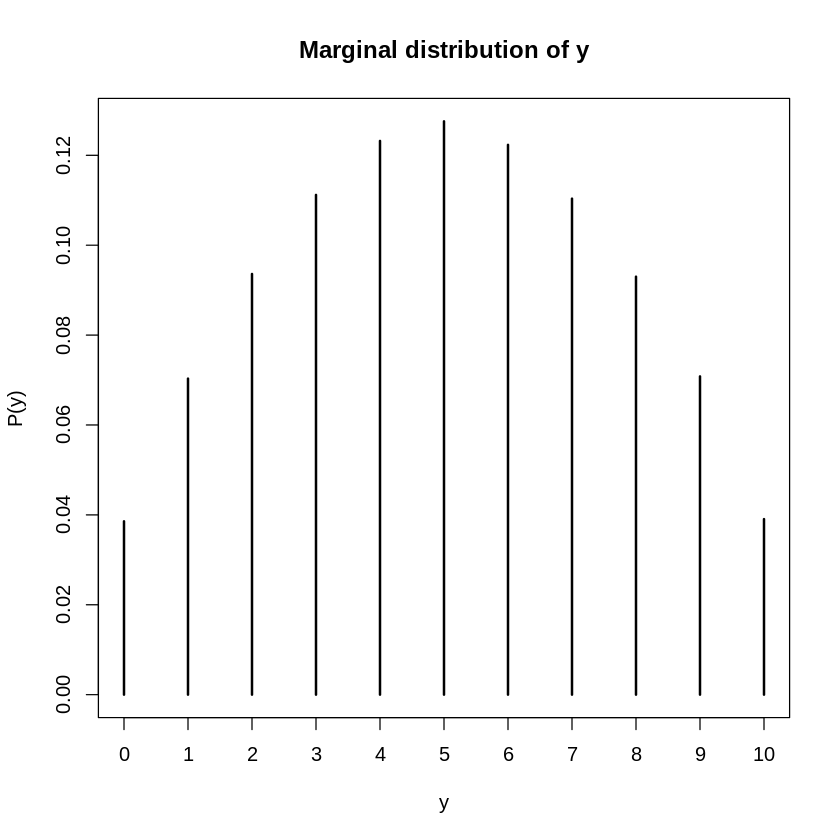

In [24]:
plot(prop.table(table(y)), ylab="P(y)", main="Marginal distribution of y")